In [ ]:
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('./retail_churn_data.csv')
df.head()


,Customer_ID,Monthly_Spend,Visits_Per_Month,Discount_Usage,Satisfaction_Score,Churn
0,CUST1000,5745.07,9,3,1.1,No
1,CUST1001,4792.60,15,3,3.4,No
2,CUST1002,5971.53,13,4,3.0,No
3,CUST1003,7284.54,1,6,1.2,Yes
4,CUST1004,4648.77,7,6,2.1,No


In [35]:
data = df.drop(columns=['Customer_ID', 'Churn'])
goal = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(data, goal, test_size=0.3, random_state=42)
base_clf = DecisionTreeClassifier(random_state=42)

bagging = BaggingClassifier(
    estimator=base_clf,
    n_estimators=100,
    max_samples=0.8,
    bootstrap=True,
    random_state=42
)

bagging.fit(X_train, y_train)
y_pred = bagging.predict(X_test)

print("Accuracy: ", accuracy_score(y_test, y_pred))

Accuracy:  0.8666666666666667


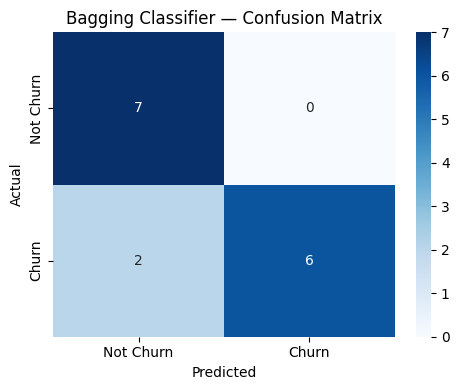

In [14]:
cm = confusion_matrix(y_test, y_pred)
labels = ["Not Churn", "Churn"]

# Plot
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Bagging Classifier — Confusion Matrix")
plt.tight_layout()
plt.show()
